# Constant Linear System Riemann Problem

Conservation Law
$$q_t + Aq_x = 0$$
Riemann Problem
$$
    q(x, t=0) = 
    \begin{cases}
        q_l & x < 0 \\
        q_r & x > 0
    \end{cases}
$$


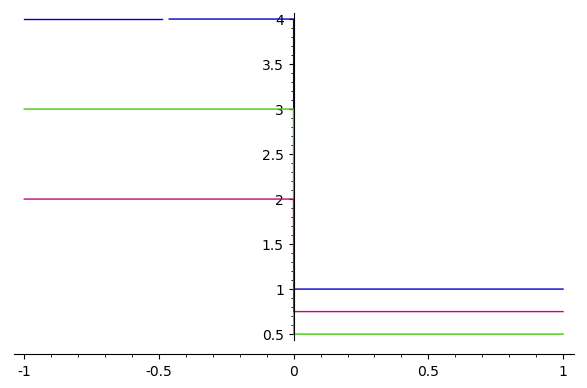

In [138]:
A = matrix([[2, 1, -1],[0, 1, 2],[0, 0, -2]])
q_l = vector([4, 3, 2])
q_r = vector([1, 0.5, 0.75])
q_0 = q_l + (q_r - q_l) * heaviside(x)
m = len(q_l)
plot([y for y in q_0(x)], -1, 1)

Eigenvalue Decomposition of A
$$ A = R\Lambda R^{-1} $$
Eigenvalues
$$ \lambda^0 \le \lambda^1 \le \cdots \le \lambda^{m-1} $$
$$ \text{diag}(\lambda^0, \lambda^1, \ldots, \lambda^{m-1}) = \Lambda $$
Eigenvectors
$$ R = [r^0 | r^1 | \cdots | r^{m-1} ] $$

In [127]:
[Lambda, R] = A.eigenmatrix_right()
lambda_ = Lambda.diagonal()
r = R.columns()
# sort eigenvalues
# match up eigenvalues with correct eigenvectors
temp = [(lambda_[p], r[p]) for p in range(m)]
temp.sort()
lambda_ = [elem[0] for elem in temp]
Lambda = diagonal_matrix(lambda_)
r = [elem[1] for elem in temp]
# normalize vectors
r = [r_p/r_p.norm() for r_p in r]
R = matrix.column(r)
# left eigenvectors
L = R.inverse()
l = L.rows()
assert((L*A*R - Lambda).norm()==0)

Characteristic Variables
$$ w = R^{-1} q $$
Initial charactestic states
$$ q_l = \sum_{p=1}^m w^p_l r^p = R w_l \qquad q_r = \sum_{p=1}^m w^p_r r^p = R w_r $$
$$ w_l = R^{-1} q_l = L q_l \qquad w_r = R^{-1} q_r = L q_r $$

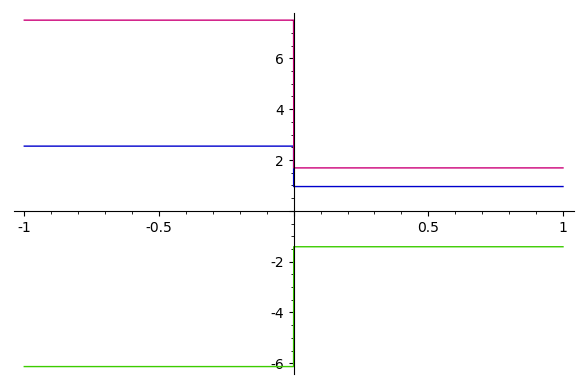

In [139]:
w_l = L*q_l
w_r = L*q_r
w_0 = w_l + (w_r - w_l)*heaviside(x)
plot([y for y in w_0(x)], -1, 1)

Characteristic solution
$$ 
    w^p(x, t) = 
    \begin{cases}
        w^p_l & x - \lambda^p t < 0 \\
        w^p_r & x - \lambda^p t > 0
    \end{cases}
$$

In [168]:
def w(x, t):
    list_ = []
    for p in range(m):
        if (x - lambda_[p]*t < 0):
            list_.append(w_l[p])
        else:
            list_.append(w_r[p])
    return vector(list_)
w = w_l + vector([heaviside(x - lambda_[p]*t)*(w_r - w_l)[p] for p in range(m)])

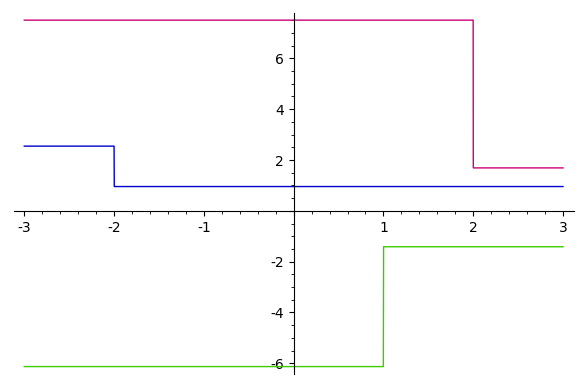

In [170]:
tfinal = 1
plot([y for y in w(t=tfinal)], x, -3, 3)

Original Solution
$$ q(x, t) = \sum_{p:\lambda^p < x/t} w_r^p r^p + \sum_{p:\lambda^p > x/t} w_l^p r^p $$

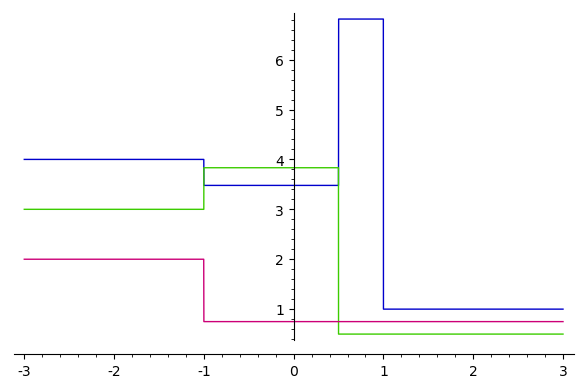

In [174]:
q = R*w
tfinal = 0.5
plot([y for y in q(t=tfinal)], x, -3, 3)

$$  

In [176]:
alpha = L*(q_r - q_l)
W = [alpha[p] * r[p] for p in range(m)]
q = q_l + sum([heaviside(x - lambda_[p]*t)*W[p] for p in range(m)])

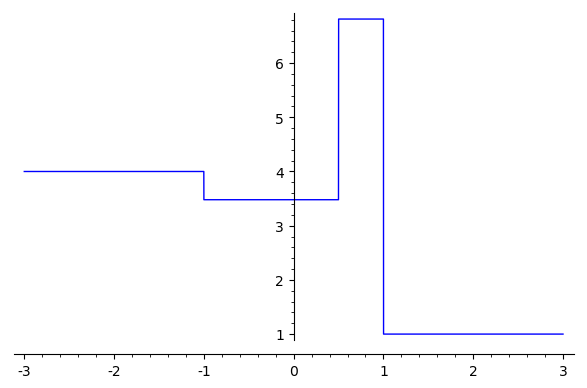

In [178]:
plot(q(t=tfinal)[0], x, -3,3)

In [179]:
W

[(-0.520833333333333, 0.833333333333333, -1.25000000000000),
 (3.33333333333333, -3.33333333333333, 0),
 (-5.81250000000000, 0, 0)]

In [ ]:
plot()